# Objective: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Datasets 
sorteos_df = pd.read_csv('../Data/downloaded/sorteos_export.csv')
premios_df = pd.read_csv('../Data/downloaded/premios_export.csv')

In [3]:
# Join datasets by 'numero_sorteo'
df = pd.merge(premios_df, sorteos_df, on='numero_sorteo', how='inner')

# Removing column "id"
df.drop(columns=['id'], inplace=True)

# Save the new dataset for latter analysis in AWS QuickSight
df.to_csv('../Data/processed/data_combined.csv', index=False)

## Data imputation

In [4]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")

df

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,44,P,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,390,80,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
2,390,129,TT,1000.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
3,390,180,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
4,390,228,P,800.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,3046,79292,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31892,3046,79361,TT,600.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31893,3046,79375,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31894,3046,79567,PR,670.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7


## What is the Distribution Prize of Loteria Santa Lucia? (InterQuartile Range)

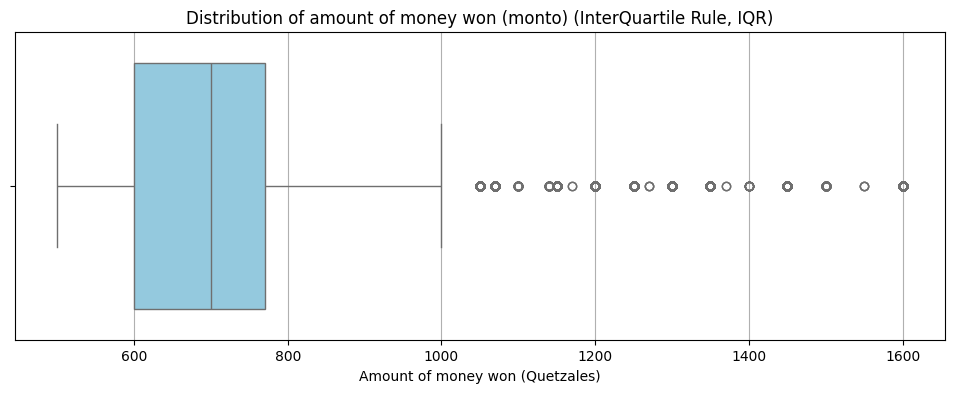

In [5]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 4))

# Create boxplot without outliers
sns.boxplot(x=df_filtered_IQR['monto'], color='skyblue')
plt.title("Distribution of amount of money won (monto) (InterQuartile Rule, IQR)")
plt.xlabel("Amount of money won (Quetzales)")
plt.grid(axis='x')
plt.show()

So with this you can see that 50% of the prizes won are **between Q600.00 and almost Q800.00**
With a **median aprox of Q750.00**

## What is the distribution of the Winning Numbers of Loteria Santa Lucia?

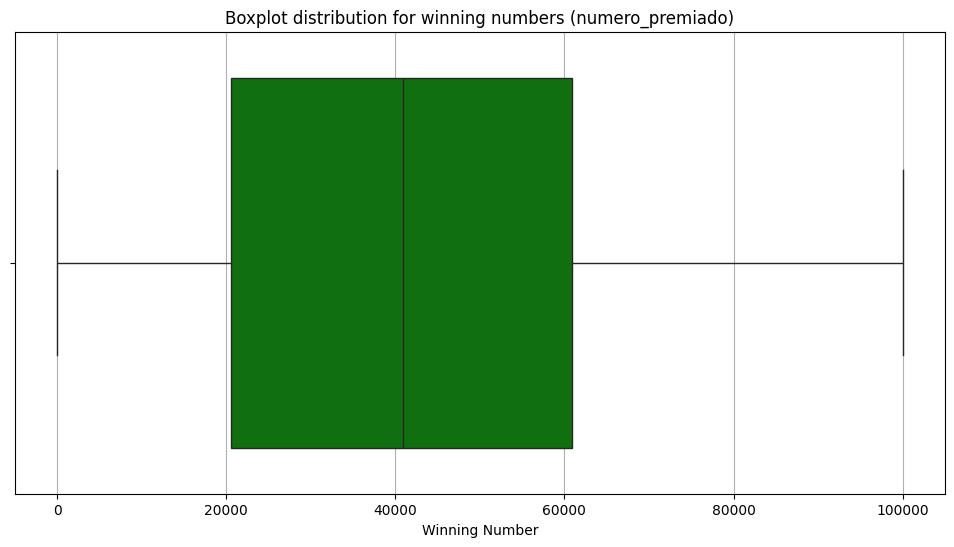

In [6]:
plt.figure(figsize=(12, 6))

# Create boxplot for the winning numbers
sns.boxplot(x=df['numero_premiado'], color='green')
plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Winning Number')
plt.grid(axis='x')
plt.show()

So, in the boxplot you can see that **50%** of winning numbers are located **between 21,000 and 62,000** aprox.
With a **median of 42,000**

## What is the distribution for the Letter Combinations (letras) of Loteria Santa Lucia? 

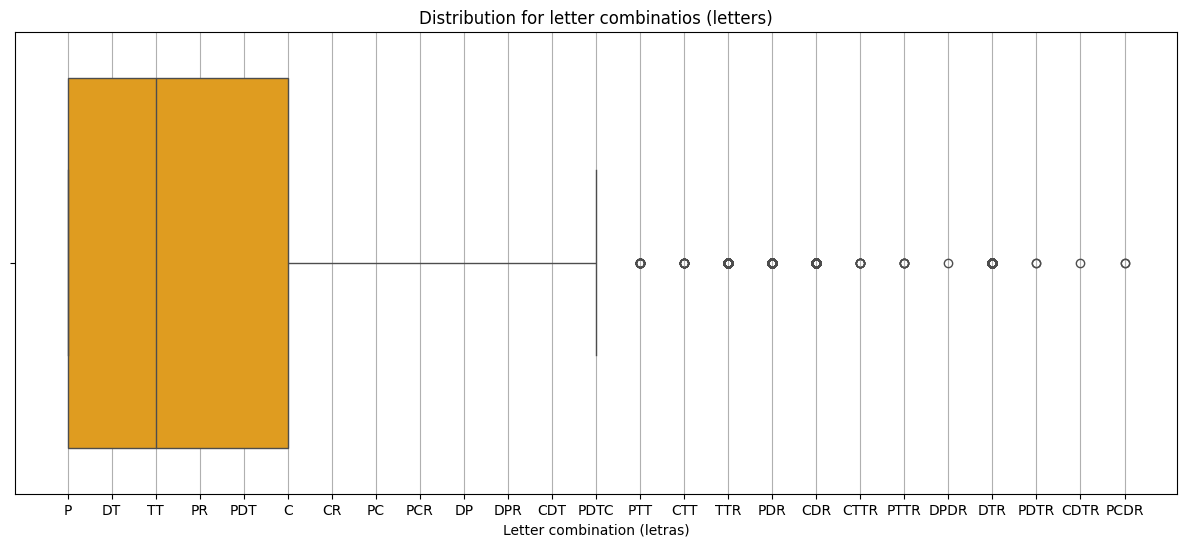

In [7]:
plt.figure(figsize=(15, 6))

# Create boxplot for letter distribution
sns.boxplot(x=df['letras'], color='orange')
plt.title('Distribution for letter combinatios (letters)')
plt.xlabel('Letter combination (letras)')
plt.grid(axis='x')
plt.show()

### What does this mean? 50% of all letter combinations are located in: P, DT, TT, PR, PDT and C

Each letter stands for: 

**P:** Prmeio (Prize, won some money like Q600)

**DT:** Doble terminacion (if 1st, 2nd or 3thd palce finsih with "55" any number that also finished with "55" will get some money)

**TT:** Triple Terminacion (if 1st, 2nd or 3thd place finsih with "756" any number that also finished with "756" will get some money)

**PR:** Premio y Reintegro (Prize and Refund, won some money and you get again a new ticket for next lottery)

**PDT:** Premio y Doble Terminacion (Won some money and fished with the last 2 numbers as the 1st, 2nd or 3rd place)

**C:** Centena (If the 1st, 2nd or 3thd place has a number like "55049" any number between 55000 and 55100 will get some money)

## What are the top 5 of most frequent Refounds? (Reintegros) by 1st, 2nd and 3thd place and in General

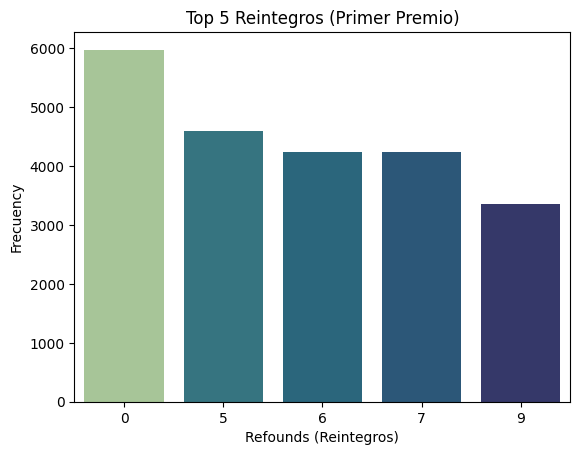

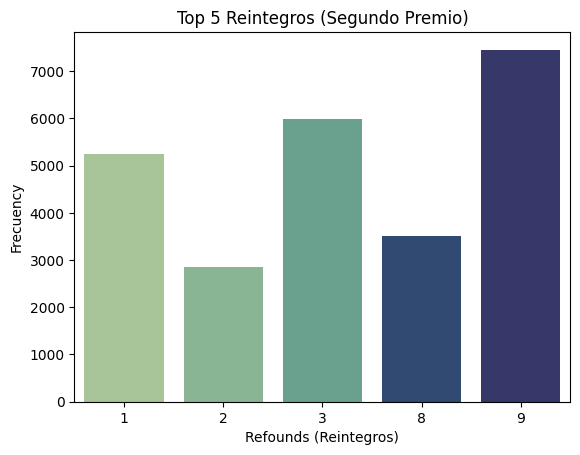

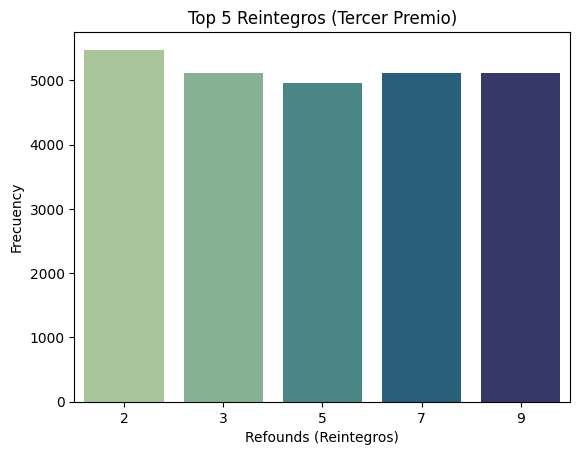

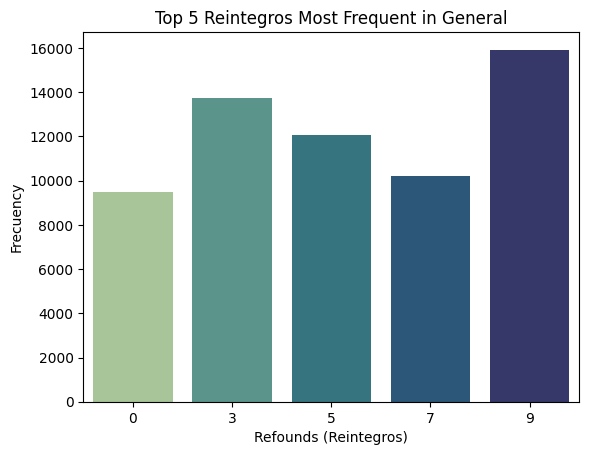

In [8]:
all_reintegros = pd.concat([
    df['reintegro_primer_premio'],
    df['reintegro_segundo_premio'],
    df['reintegro_tercer_premio']
])

def plot_top_5_reintegros(column_dataset, plot_title):
    top_5 = column_dataset.value_counts().head(5)
    
    # Create the barplot for the frequency
    sns.barplot(x=top_5.index, y=top_5.values, palette='crest', hue=top_5.index, legend=False)
    plt.title(plot_title)
    plt.xlabel("Refounds (Reintegros)")
    plt.ylabel("Frecuency")
    plt.show()

plot_top_5_reintegros(df['reintegro_primer_premio'], 'Top 5 Reintegros (Primer Premio)')
plot_top_5_reintegros(df['reintegro_segundo_premio'], 'Top 5 Reintegros (Segundo Premio)')
plot_top_5_reintegros(df['reintegro_tercer_premio'], 'Top 5 Reintegros (Tercer Premio)')
plot_top_5_reintegros(all_reintegros, 'Top 5 Reintegros Most Frequent in General')

## Percentage of Winning Numbers by Lottery, (Ordario and Extraordinario)

The lotery **'ordinario'** normaly sales up to **80,000 tickets**

The **'extraodinario'** can sale up to **90,000 tickets** (in special editions they can sale up to 100,000 tickets).

In December 2024 Loteria Santa Lucia made public that they do the lottery once the reach the [80% of tickets sold](https://loteria.org.gt/site/raffle). This in order to be profitable and avoid losses of money. Based on **"Código Civil Decreto Ley Número 106, Artículo 2139"** of the [Guatemalan law.](https://www.oas.org/dil/esp/codigo_civil_guatemala.pdf)

In [9]:
# See how many 'sorteos' we have in ORDINARIOS and EXTRAORDINARIOS
df_ordinarios = df[df['tipo_sorteo'] == 'ORDINARIO']
df_extraordinarios = df[df['tipo_sorteo'] == 'EXTRAORDINARIO']

total_sorteos_ordinarios = df_ordinarios['numero_sorteo'].nunique()
total_sorteos_extraordinarios = df_extraordinarios['numero_sorteo'].nunique()

print(f"Total number of sorteos ordinarios: {total_sorteos_ordinarios}")
print(f"Total number of sorteos extraordinarios: {total_sorteos_extraordinarios}")



Total number of sorteos ordinarios: 24
Total number of sorteos extraordinarios: 6


In [26]:
# Total Winning numbers by sorteo ordinario and extraordinario
winners_by_sorteo_ordinario = df_ordinarios['numero_premiado'].count()
winners_by_sorteo_extraordinario = df_extraordinarios['numero_premiado'].count()

print(f"Total number of winning numbers in ORDINARIO lotteries: {winners_by_sorteo_ordinario}")
print(f"Total number of winning numbers in EXTRAORDINARIO lotteries: {winners_by_sorteo_extraordinario}")

Total number of winning numbers in ORDINARIO lotteries: 21866
Total number of winning numbers in EXTRAORDINARIO lotteries: 10030


In [30]:
tickets_issued_ordinario = 80_000

# Calculate percentage of winning numbers
grand_total_tickets_issued_ordinario = total_sorteos_ordinarios * tickets_issued_ordinario
percentage_winning_numbers_ordinario = (winners_by_sorteo_ordinario.sum() / grand_total_tickets_issued_ordinario) * 100
print(f"Percentage of winning numbers in draws (ordinario): {percentage_winning_numbers_ordinario:.2f}%")

Percentage of winning numbers in regular draws (ordinario): 1.14%


In [38]:
tickets_issued_extraordinario = 90_000

# Calculate percentage of winning numbers
grand_total_tickets_issued_extraordinario = total_sorteos_extraordinarios * tickets_issued_extraordinario
percentage_winning_numbers_extraordinario = (winners_by_sorteo_extraordinario.sum() / grand_total_tickets_issued_extraordinario) * 100
print(f"Percentage of winning numbers in draws (extraordinario): {percentage_winning_numbers_extraordinario:.2f}%")

Percentage of winning numbers in draws (extraordinario): 1.86%


In [36]:
cumulative_probability_ordinario = (100 - percentage_winning_numbers_ordinario) / percentage_winning_numbers_ordinario
print(f"Odds of winning any prize in a ordinario lottery (not the big one, just a prize) is 1 in {cumulative_probability_ordinario:.0f}")

Odds of winning any prize in a ordinario lottery (not the big one, just a prize) is 1 in 87


In [37]:
cumulative_probability_extraordinario = (100 - percentage_winning_numbers_extraordinario) / percentage_winning_numbers_extraordinario
print(f"Odds of winning any prize in a ordinario lottery (not the big one, just a prize) is 1 in {cumulative_probability_extraordinario:.0f}")

Odds of winning any prize in a ordinario lottery (not the big one, just a prize) is 1 in 53


## Total profit of the "sorteos" and how do the breakdown of profit works in Loteria Santa Lucia

The breakdown of the price of the full tickets works as follows: 

1 "cachito" is a piece of 10, 10 "cachitos" make a full ticket.

Q7.00 by "cachito" or **Q70 the full ticket** when the big prize is **less than Q2,200,000**

Q15.00 by "cachito" or **Q150 the full ticket** when the big prize is **equal or more than Q2,200,000**

Q25.00 by "cachito" or **Q250 the full ticket** when the big prize is **equal or more than Q4,000,000**

Q30.00 by "cachito" or **Q300 the full ticket** when the big prize is **equal or more than Q6,000,000**

Q35.00 by "cachito" or **Q350 the full ticket** when the big prize is **equal or more than Q7,000,000**

The lotteries **ORDINARIO** are the ones that cost Q70.00 the full ticket, **EXTRAORDINARIO** ones are from Q15.00 up to Q35.00 or more.

### What is the Lottery number that has given the mayor cantity of money in prizes? 